In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
from mnist import MNIST
from mlpalae import MlpAlae

In [3]:
mnist = MNIST()
alae = MlpAlae()

In [4]:
alae.load_weights('./ckpt/lat50_gam10_sepopt_seed_beta0_epoch50')

In [5]:
x_train, y_train = mnist.rawdata()
x_test, y_test = mnist.rawdata(train=False)

# trainset = np.concatenate((x_train.reshape(-1, 784), np.eye(10)[y_train]), axis=-1)
# testset = np.concatenate((x_test.reshape(-1, 784), np.eye(10)[y_test]), axis=-1)
trainset = np.concatenate((x_train.reshape(-1, 784), np.zeros((x_train.shape[0], 10))), axis=-1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



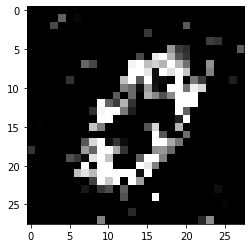

In [6]:
idx = 37
latent, image = alae(trainset[idx:idx + 1].reshape(1, 784 + 10))
plt.imshow(np.clip(image.numpy()[0, :784].reshape(28, 28), 0, 1), cmap='gray')

In [7]:
idxA, idxB = 27, 62
latentA = alae.encoder(trainset[idxA:idxA + 1].reshape(1, 784 + 10))
latentB = alae.encoder(trainset[idxB:idxB + 1].reshape(1, 784 + 10))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



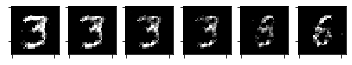

In [8]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA
for i in range(num + 1):
    image = alae.generator(latent).numpy()[0, :784].reshape(28, 28)
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(image, 0, 1), cmap='gray')
    latent += delta

plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

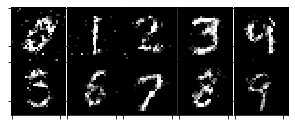

In [9]:
cherrypicked = [37, 14, 76, 27, 20, 138, 62, 15, 41, 4 ]
fig = plt.figure(figsize=(5, 2))
axs = [fig.add_subplot(2, 5, i + 1) for i in range(10)]

for i in range(10):
    ax = axs[i]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    
    idx = cherrypicked[i]
    latent, image = alae(trainset[idx:idx + 1].reshape(1, 784 + 10))
    ax.imshow(np.clip(image[0, :784].numpy().reshape(28, 28), 0, 1), cmap='gray')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('enum', bbox_inches='tight', pad_inches=0)